# Logistic Regression

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Ground Truth and Parameters

In [171]:
ground_k = 3
ground_b = 2
m = 1000
non_linear_seperablility = 0.1
x_lowb = -1
x_upb = 1
y_lowb = x_lowb * ground_k + ground_b
y_upb = x_upb * ground_k + ground_b

## 随机生成样本

In [172]:
np.set_printoptions(precision=3, suppress=True)
x = np.random.uniform(x_lowb,x_upb,(1,m))
y = np.random.uniform(y_lowb,y_upb,(1,m))

In [173]:
ground_x = np.linspace(x_lowb,x_upb,100)
ground_y = 3*ground_x + ground_b

In [174]:
label_map = {"0":1,"1":0}

In [175]:
label = np.zeros(x.shape)
for i in range(x.shape[1]):
    if y[0,i] - ground_k * x[0,i] - ground_b > 0:
        label[0,i] = 1
    if np.random.uniform(0,1) < non_linear_seperablility:
        label[0,i] = label_map[str(int(label[0,i]))]

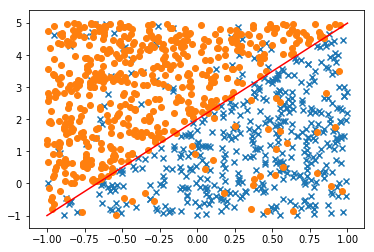

In [176]:
plt.scatter(x[label==0],y[label==0],marker='x')
plt.scatter(x[label==1],y[label==1],marker='o')
plt.plot(ground_x,ground_y,color='r')

## Get start

$$g(\eta)=\dfrac{1}{1+e^{-\eta}}$$

$$J(\theta)=-\dfrac{1}{m}\Sigma_{i=1}^{m}\left(y^{(i)}log(g(\theta^Tx^{(i)})+(1-y^{(i)})log(1-g(\theta^Tx^{(i)}))\right)=-\dfrac{1}{m}y^Tlog(g(X\theta))-(1-y)^Tlog(1-g(X\theta))$$

$$\dfrac{\partial J}{\partial \theta_j}=\Sigma_{i=1}^{m}\left(g(\theta^Tx^{(i)})-y^{(i)}\right)x^{(i)}_j$$

$$\dfrac{\partial J}{\partial \theta}=X^T\left(g(X\theta)-y\right)$$

In [177]:
def sigmoid(eta):
    return 1/(1+np.e**(-eta))

def cost(Theta,X,Y):
    Y = Y.reshape((1,-1))
    pred = sigmoid(X.dot(Theta))
    return -(Y.dot((np.log(sigmoid(pred))))+(1-Y).dot(np.log(1-pred)))/m
    
def dcost(Theta,X,Y):
    Y = Y.reshape((-1,1))
    return (X.T.dot(sigmoid(X.dot(Theta))-Y))/m

#### 梯度下降

In [218]:
X_ = np.vstack((x,y))
X_ = np.vstack((np.ones((1,m)),X_)).T

In [225]:
stop_criterion = 501
alpha = 1

In [226]:
theta = np.zeros((3,1))
cost_history = np.zeros((stop_criterion,))
for epoch in range(stop_criterion):
    cost_history[epoch] = cost(theta,X_,label)
    Dcost = dcost(theta,X_,label)
    theta -= alpha * Dcost
    if epoch % 20 == 0:
        #print(theta)
        print(f"epoch:{epoch},cost:{cost_history[epoch]}")

epoch:0,cost:0.5750683447112122
epoch:20,cost:0.45984607843890707
epoch:40,cost:0.4364061354171607
epoch:60,cost:0.428999720216063
epoch:80,cost:0.4257613527416886
epoch:100,cost:0.4241005941369623
epoch:120,cost:0.42316748536820953
epoch:140,cost:0.4226126457667632
epoch:160,cost:0.4222703998674742
epoch:180,cost:0.42205410821928896
epoch:200,cost:0.42191518974215003
epoch:220,cost:0.4218249970957594
epoch:240,cost:0.4217660153508908
epoch:260,cost:0.42172725766236724
epoch:280,cost:0.42170170744160507
epoch:300,cost:0.4216848278522864
epoch:320,cost:0.42167366054708316
epoch:340,cost:0.42166626540078334
epoch:360,cost:0.421661365143132
epoch:380,cost:0.42165811671744396
epoch:400,cost:0.4216559627072971
epoch:420,cost:0.42165453413326826
epoch:440,cost:0.42165358656394464
epoch:460,cost:0.4216529579926144
epoch:480,cost:0.42165254100649896
epoch:500,cost:0.42165226437337505


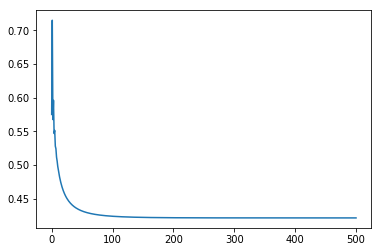

In [227]:
plt.plot(cost_history)

In [217]:
y_pred = (- theta[0,0] - theta[1,0]*ground_x)/theta[2,0]

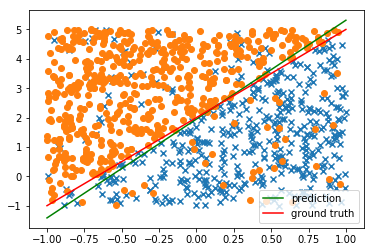

In [192]:
plt.plot(ground_x,y_pred,'g')
plt.plot(ground_x,ground_y,'r')
plt.scatter(x[label==0],y[label==0],marker='x')
plt.scatter(x[label==1],y[label==1],marker='o')
plt.legend(['prediction','ground truth'])

#### 牛顿法

$$\dfrac{\partial J}{\partial \theta_j \partial \theta_k}=\dfrac{1}{m}\Sigma_{i=1}^{m}g(\theta^Tx^{(i)})(1-g(\theta^Tx^{(i)}))x^{(i)}_kx^{(i)}_j$$

In [205]:
def H(Theta,X,Y):
    pred = sigmoid(X.dot(Theta))
    #print(X.shape)
    #print(pred.shape)
    #print(Y.shape)
    H = X.T.dot(pred*(1-pred)*X)/m
    #print(H_inv.shape)
    return H

In [221]:
theta = np.zeros((3,1))
stop_criterion = 15
alpha = 0.01
cost_history = np.zeros((stop_criterion,))
for epoch in range(stop_criterion):
    cost_history[epoch] = cost(theta,X_,label)
    Dcost = dcost(theta,X_,label)
    theta -= np.linalg.solve(H(theta,X_,label),Dcost)
    
    if epoch % 1 == 0:
        print(f"epoch:{epoch},cost:{cost_history[epoch]}")
        #print(theta)

epoch:0,cost:0.5750683447112122
epoch:1,cost:0.4369998702185758
epoch:2,cost:0.4225436271211179
epoch:3,cost:0.4216143156837895
epoch:4,cost:0.4216511481184605
epoch:5,cost:0.42165171901364773
epoch:6,cost:0.42165171906584786
epoch:7,cost:0.4216517190658478
epoch:8,cost:0.42165171906584786
epoch:9,cost:0.42165171906584786
epoch:10,cost:0.42165171906584786
epoch:11,cost:0.42165171906584786
epoch:12,cost:0.42165171906584786
epoch:13,cost:0.42165171906584786
epoch:14,cost:0.42165171906584786
